### Introduction

직관적인 시각화 plots를 시도해 볼 것입니다.

그래프적 시각화부터 통꼐적 시각화까지 API를 활용해 볼 것입니다.

<br>

**사용할 plots**

Simple horizontal bar plot : Target variable distribution

Correlation Heatmap plot

Scatter plot

Vertical bar plot

3D Scatter plot

<br>

**순서**

Data Quality Checks : visualising and evaluating all missing/Null values

Feature inspection and filtering: Binary, categorical and othe variables

Feature importance ranking via learning models: Random Forest and Gradient Boosted model

In [22]:
# Let us load in the relevant Python modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings

In [23]:
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')

In [24]:
#load data

train = pd.read_csv('./input/train.csv')
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [25]:
#데이터 셋에 행과 열이 얼마나 있는지 보기

rows = train.shape[0]
columns = train.shape[1]
print("The train dataset contains {0} rows and {1} columns".format(rows, columns))

The train dataset contains 595212 rows and 59 columns


#### Data Quality Checks

**Null or missing values check**

In [26]:
#any()  applied twice to check run the isnull check acros all columns.
train.isnull().any().any()
#결과가 False가 나왔다고해서 무조건 missing 데이터에 대한 정확한 유무 판단이 힘들다. 그래서 아래 과정 시행

False

In [27]:
#데이터를 하나 하나 뜯어보는 과정 시작
train_copy = train # 복사를 하고 수정을 해야 원본 데이터에 문제가 안 생김
train_copy = train_copy.replace(-1, np.NaN)

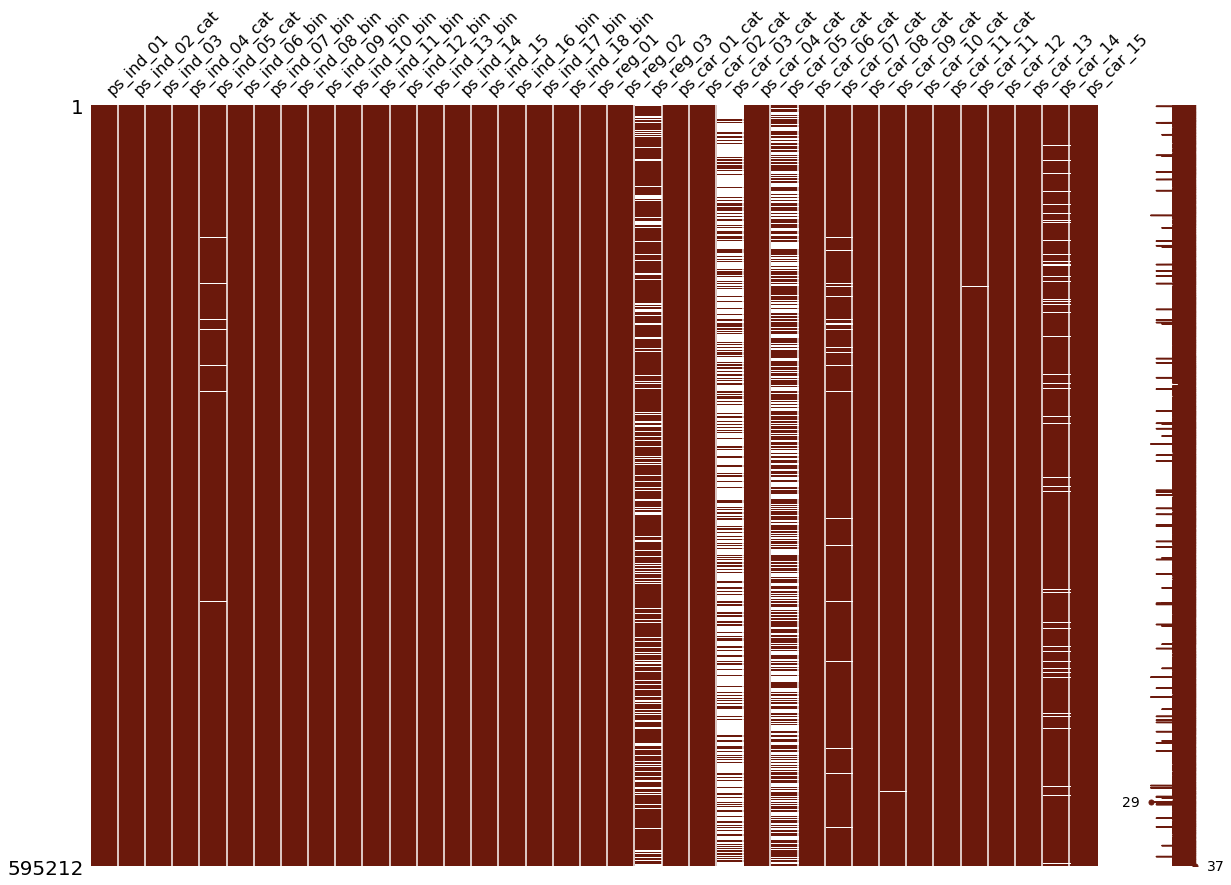

In [28]:
#missingno 라이브러리를 사용하여 결측치 부분 시각화하여 보기

import missingno as msno
#Nullity or missing values by columns

msno.matrix(df=train_copy.iloc[:,2:39], figsize=(20,14), color =(0.42, 0.1, 0.05))

null columns

ps_ind_05_cat | ps_reg_03 | ps_car_03_cat | ps_car_05_cat | ps_car_05_cat | ps_car_07_cat | ps_car_09_cat | ps_car_14

<br>

그래프를 보면 3개의 컬럼은 심각할 정도로 크기 때문에 단순히 -1로 대체해버리는 전략은 좋지 않다

In [29]:
### Target variable inspection

##지도학습을 위해서 0과1로 나누기

data = [go.Bar(
            x = train["target"].value_counts().index.values,
            y = train["target"].value_counts().values,
            text='Distribution of target variable'
    )]

layout = go.Layout(
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

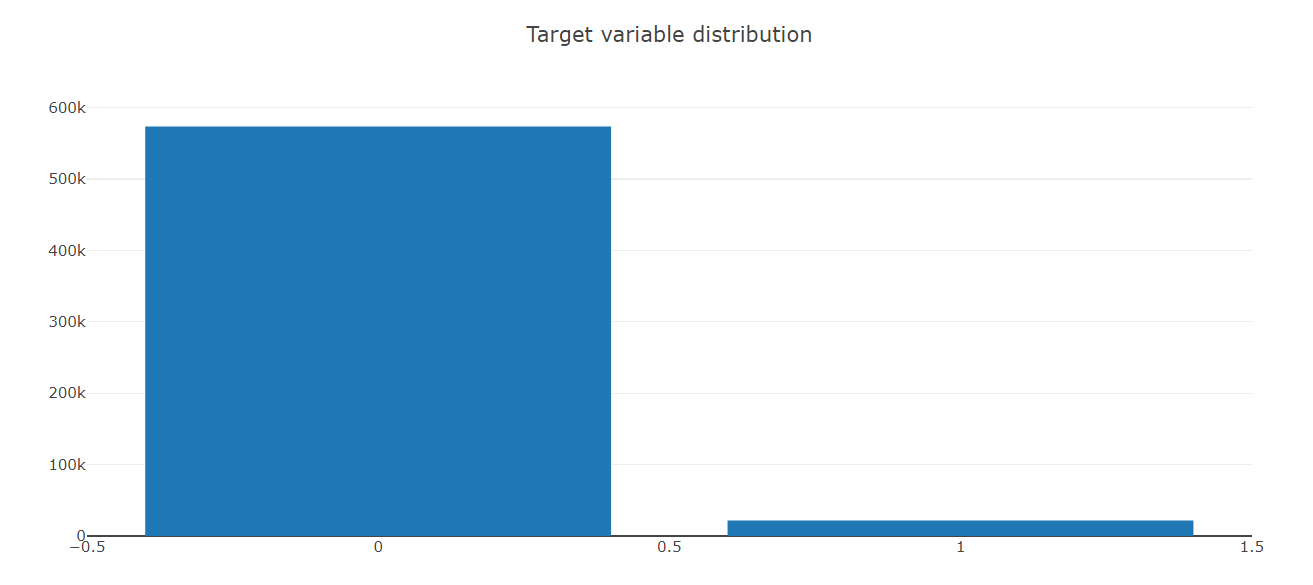

 타겟 변수를 보니 너무 밸런스가 맞지 않음으 확인 했습니다. 

 Datatype체크 후에 collections module를 다시 점검해야할 것 같습니다.

In [30]:
Counter(train.dtypes.values)

Counter({dtype('int64'): 49, dtype('float64'): 10})

In [31]:
train_float = train.select_dtypes(include=["float64"])
train_int = train.select_dtypes(include = ['int64'])

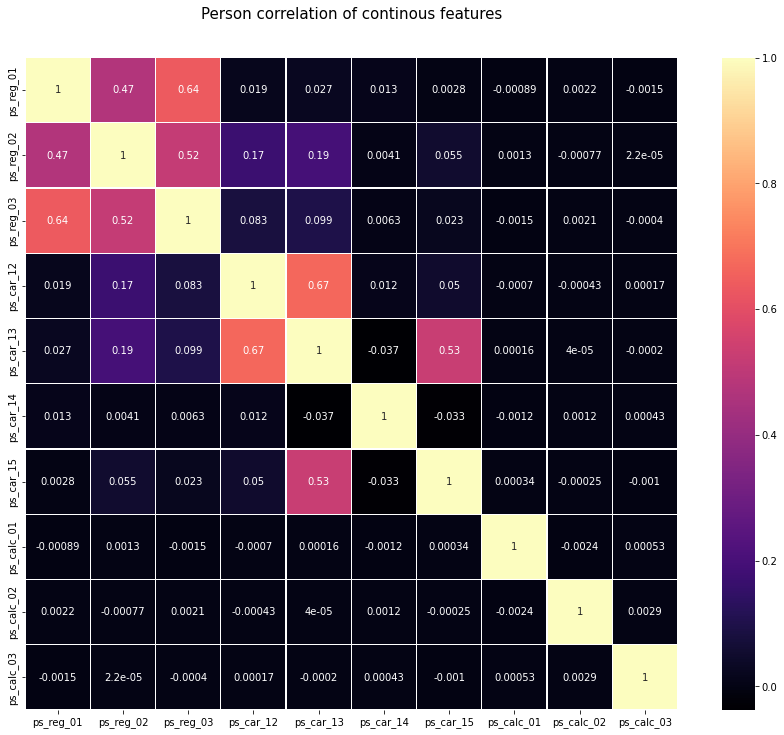

In [32]:
#선형적으로 correlation plots 그리기 
#seaborn일는 통계적 시각화 패키지를 활용하여 히트맵 그리기
#person corrleation 계산

#Correlation of float features

colormap = plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Person correlation of continous features', y = 1.05, size=15)
sns.heatmap(train_float.corr(), linewidths=0.1, vmax=1.0, square=True,
            cmap = colormap, linecolor='white', annot=True)

##### 정리

*Positive linear correlation

(ps_reg_01,ps_reg_03)

(ps_reg_02,ps_reg_03)

(ps_car_12, ps_car_13)

(ps_car_13, ps_car_15)

In [37]:
#train_int = train_int.drop(["id", "target"], axis=1)
# colormap = plt.cm.bone
# plt.figure(figsize=(21,16))
# plt.title('Pearson correlation of categorical features', y=1.05, size=15)
# sns.heatmap(train_cat.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=False)
data = [
    go.Heatmap(
        z= train_int.corr().values,
        x=train_int.columns.values,
        y=train_int.columns.values,
        colorscale='Viridis',
        reversescale = False,)
       # text = True ,)
       # opacity = 1.0 )
]

layout = go.Layout(
    title='Pearson Correlation of Integer-type features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

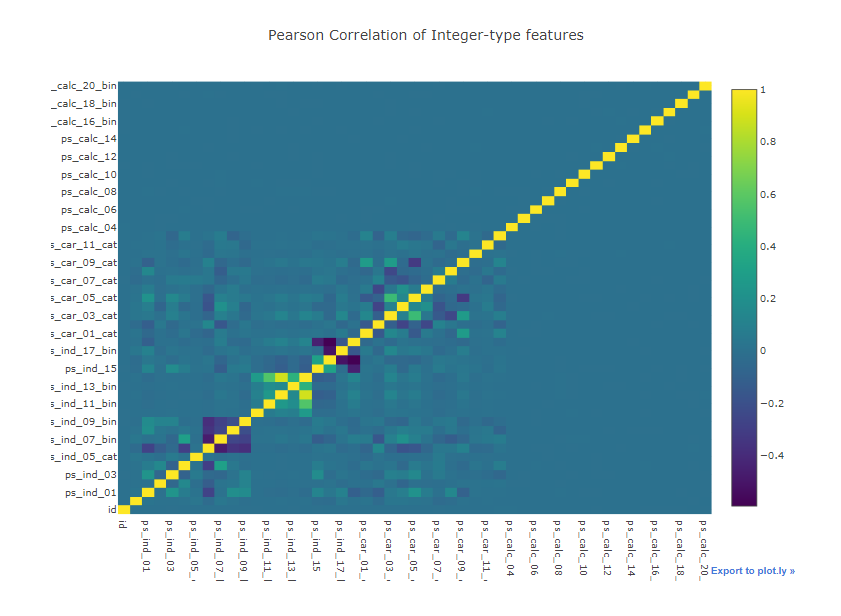